In [1]:
from src.visualization.render_mp4 import unpickle_data
from matplotlib import pyplot as plt
import numpy as np
from pathlib import Path
from glob import glob

In [2]:
base_path = Path("/data/scratch-oc40/pulkitag/ankile/furniture-data/")
low_real_path = base_path / "raw/diffik/real/one_leg_full/teleop/low/success"
med_sim_path = base_path / "raw/diffik/sim/one_leg_render_rppo/rollout/med/success"

Text(0.5, 0.98, 'Randomness: med')

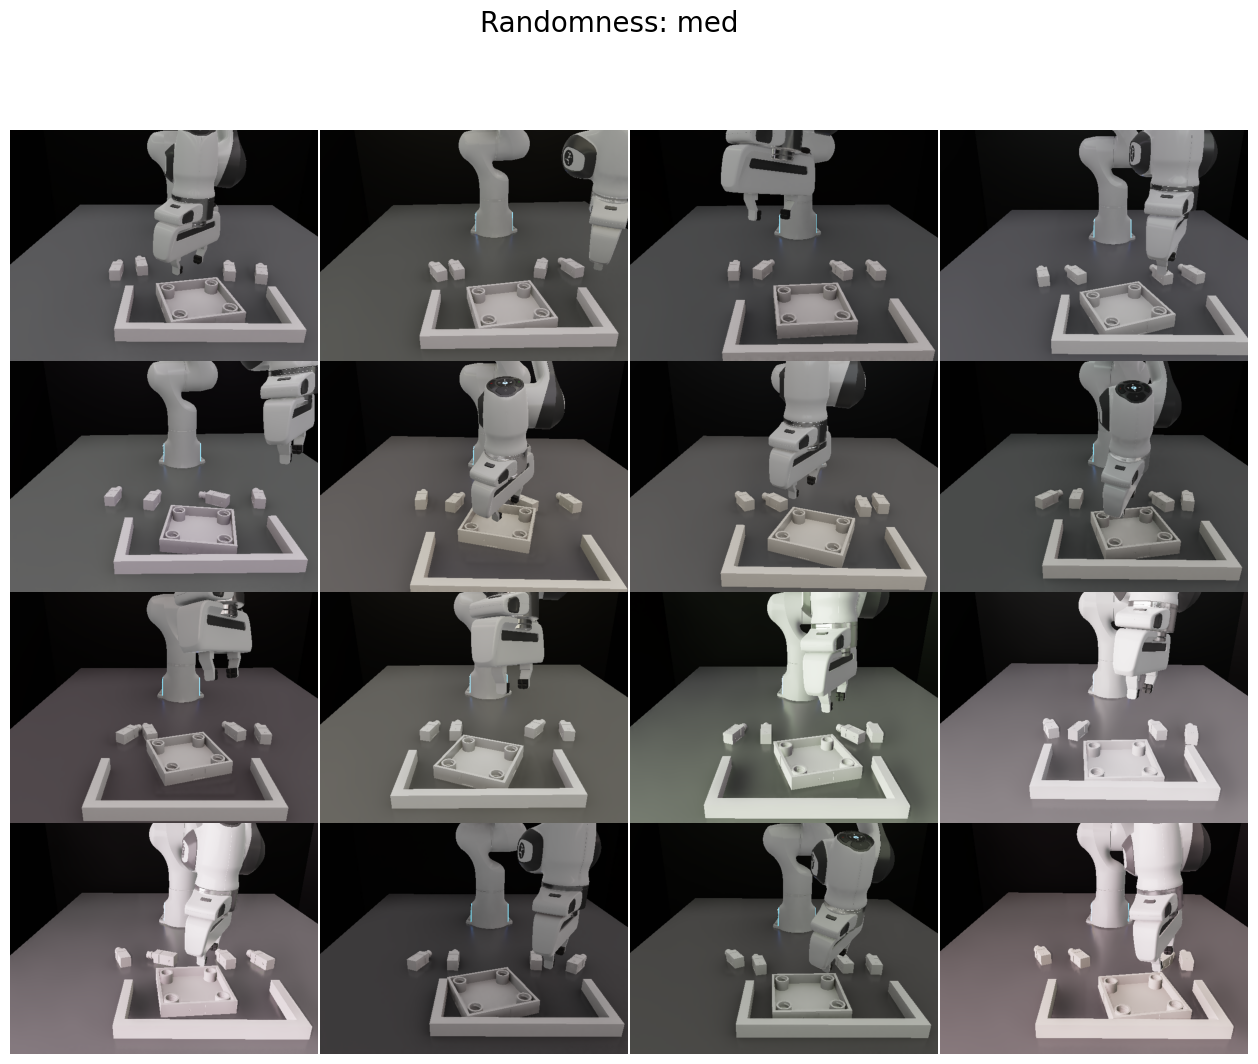

In [11]:
# def plot_images(randomness, path):
randomness = "med"
path = med_sim_path
images = []
idx = 0
for f in glob(str(Path(path) / "*.pkl")):
    # print(f'File: {f}, Index: {idx}')
    data = unpickle_data(f)
    
    obs = data["observations"][5].copy()

    images.append(obs["color_image2"].copy())
    idx += 1
    if idx > 16:
        break

# Plot the 16 images in a 4x4 grid
fig, axs = plt.subplots(4, 4, figsize=(16, 12))
for i, ax in enumerate(axs.flat):
    # ax.imshow(np.clip(images[i] + 25, a_min=0, a_max=255))
    ax.imshow(images[i])
    ax.axis("off")

# Remove whitespace between subplots
plt.subplots_adjust(wspace=0, hspace=0)

# Make a title with the randomness
fig.suptitle(f"Randomness: {randomness}", fontsize=20)

Text(0.5, 0.98, 'Randomness: low')

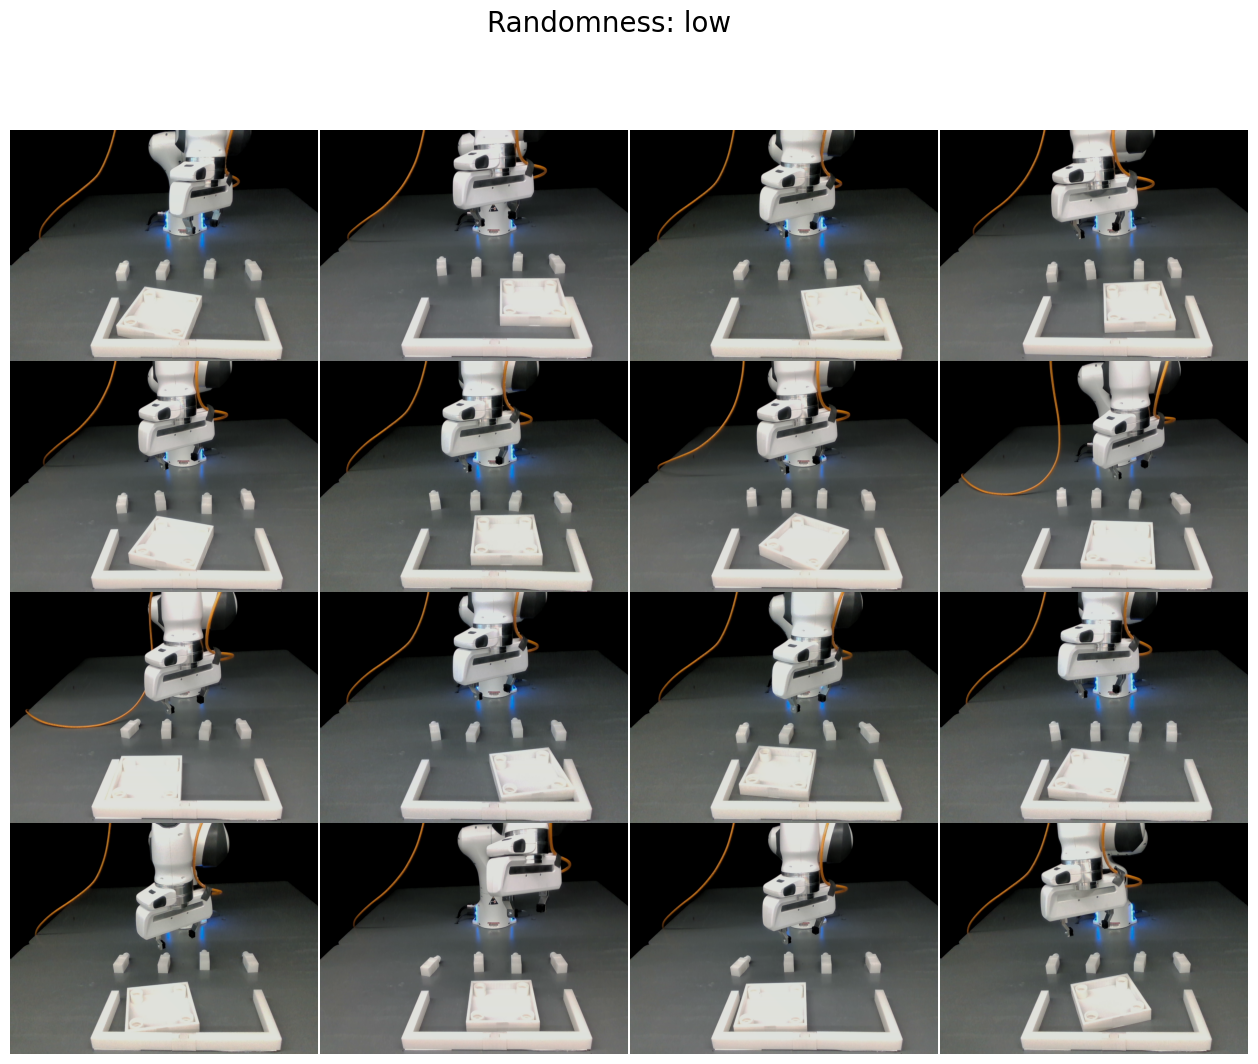

In [16]:
import cv2
def change_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v = cv2.add(v,value)
    v[v > 255] = 255
    v[v < 0] = 0
    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

# def plot_images(randomness, path):
randomness = "low"
path = low_real_path
images = []
idx = 0
for f in glob(str(Path(path) / "*.pkl")):
    # print(f'File: {f}, Index: {idx}')
    data = unpickle_data(f)
    
    obs = data["observations"][5].copy()

    images.append(obs["color_image2"].copy())
    idx += 1
    if idx > 16:
        break

# Plot the 16 images in a 4x4 grid
fig, axs = plt.subplots(4, 4, figsize=(16, 12))
for i, ax in enumerate(axs.flat):
    # ax.imshow(images[i])
    ax.imshow(change_brightness(images[i], value=-30))
    ax.axis("off")

# Remove whitespace between subplots
plt.subplots_adjust(wspace=0, hspace=0)

# Make a title with the randomness
fig.suptitle(f"Randomness: {randomness}", fontsize=20)

Text(0.5, 0.98, 'Randomness: med')

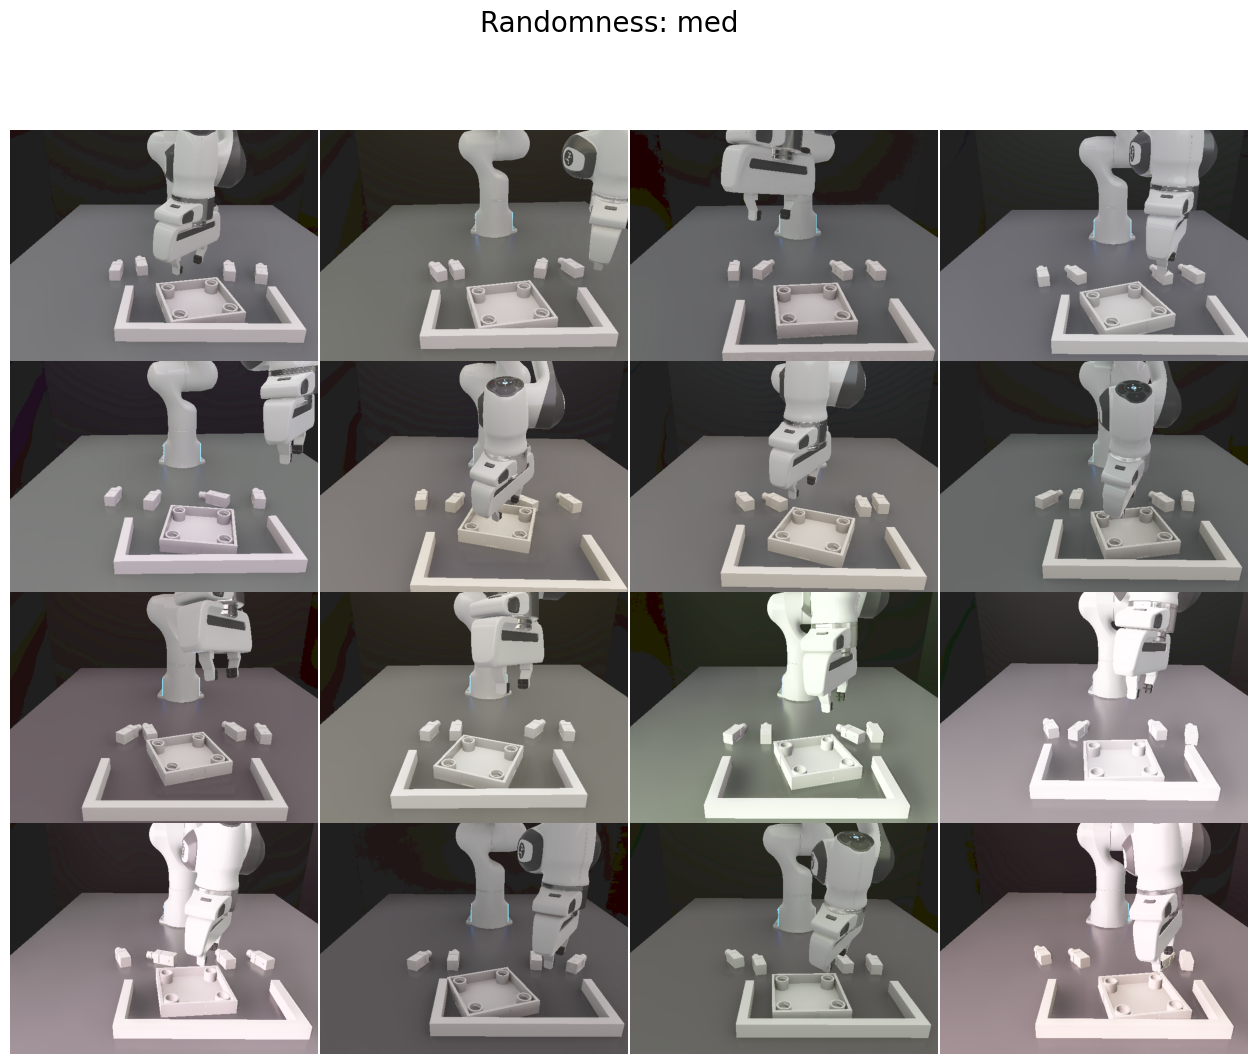

In [18]:
# def plot_images(randomness, path):
randomness = "med"
path = med_sim_path
images = []
idx = 0
for f in glob(str(Path(path) / "*.pkl")):
    # print(f'File: {f}, Index: {idx}')
    data = unpickle_data(f)
    
    obs = data["observations"][5].copy()

    images.append(obs["color_image2"].copy())
    idx += 1
    if idx > 16:
        break

# Plot the 16 images in a 4x4 grid
fig, axs = plt.subplots(4, 4, figsize=(16, 12))
for i, ax in enumerate(axs.flat):
    # ax.imshow(np.clip(images[i] + 25, a_min=0, a_max=255))
    # ax.imshow(images[i])
    ax.imshow(change_brightness(images[i], value=30))
    ax.axis("off")

# Remove whitespace between subplots
plt.subplots_adjust(wspace=0, hspace=0)

# Make a title with the randomness
fig.suptitle(f"Randomness: {randomness}", fontsize=20)